In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import cv2

In [2]:
df = pd.read_csv('./csvfile/full_train.csv')

In [3]:
df.head()

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,target,tfrecord,width,...,head_neck,palm_soles,oral_genital,unknown,mean_1,mean_2,mean_3,std_1,std_2,std_3
0,ISIC_0000000.jpg,-1,0,0.611111,anterior torso,NV,benign,0,4,1022,...,0,0,0,0,0.466188,0.504615,0.576000,0.195260,0.275621,0.336294
1,ISIC_0000001.jpg,-1,0,0.333333,anterior torso,NV,benign,0,18,1022,...,0,0,0,0,0.639990,0.620171,0.629464,0.115119,0.139146,0.156790
2,ISIC_0000002.jpg,-1,0,0.666667,upper extremity,MEL,malignant,1,0,1022,...,0,0,0,0,0.556858,0.591076,0.718072,0.067298,0.160527,0.254392
3,ISIC_0000003.jpg,-1,1,0.333333,upper extremity,NV,benign,0,24,1022,...,0,0,0,0,0.706946,0.633711,0.588592,0.184754,0.250137,0.294834
4,ISIC_0000004.jpg,-1,1,0.888889,posterior torso,MEL,malignant,1,14,1022,...,0,0,0,0,0.467062,0.351849,0.412361,0.369920,0.299431,0.340843


In [4]:
len(df)

58457

In [5]:
df['target'].value_counts()

0    53351
1     5106
Name: target, dtype: int64

In [6]:
df['diagnosis'].value_counts()

unknown    27126
NV         18068
MEL         5106
BCC         3323
BKL         2847
AK           867
SCC          628
VASC         253
DF           239
Name: diagnosis, dtype: int64

In [7]:
url_dataframe = df
url_dataframe['diagnosis']  = url_dataframe['diagnosis'].apply(lambda x: x.replace('MEL', '0'))
url_dataframe['diagnosis']  = url_dataframe['diagnosis'].apply(lambda x: x.replace('NV', '1'))
url_dataframe['diagnosis']  = url_dataframe['diagnosis'].apply(lambda x: x.replace('BCC', '2'))
url_dataframe['diagnosis']  = url_dataframe['diagnosis'].apply(lambda x: x.replace('BKL', '3'))
url_dataframe['diagnosis']  = url_dataframe['diagnosis'].apply(lambda x: x.replace('AK', '4'))
url_dataframe['diagnosis']  = url_dataframe['diagnosis'].apply(lambda x: x.replace('SCC', '5'))
url_dataframe['diagnosis']  = url_dataframe['diagnosis'].apply(lambda x: x.replace('VASC', '6'))
url_dataframe['diagnosis']  = url_dataframe['diagnosis'].apply(lambda x: x.replace('DF', '7'))
url_dataframe['diagnosis']  = url_dataframe['diagnosis'].apply(lambda x: x.replace('unknown', '8'))
url_dataframe['diagnosis'] = url_dataframe['diagnosis'].apply(lambda x: int(x))

In [8]:
df_0 = url_dataframe.groupby('diagnosis').get_group(0)
df_1 = url_dataframe.groupby('diagnosis').get_group(1)
df_2 = url_dataframe.groupby('diagnosis').get_group(2)
df_3 = url_dataframe.groupby('diagnosis').get_group(3)
df_4 = url_dataframe.groupby('diagnosis').get_group(4)
df_5 = url_dataframe.groupby('diagnosis').get_group(5)
df_6 = url_dataframe.groupby('diagnosis').get_group(6)
df_7 = url_dataframe.groupby('diagnosis').get_group(7)
df_8 = url_dataframe.groupby('diagnosis').get_group(8)

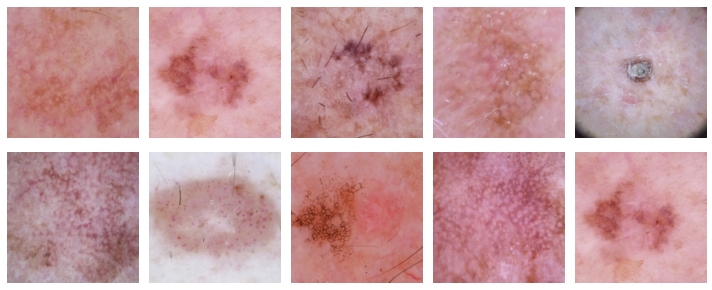

In [22]:
holo = df_4
holo.reset_index()
import matplotlib.pyplot as plt
import os
import random

f , ax = plt.subplots(2,5)
f.set_size_inches(10, 10)
f.set_figheight(5)
f.set_figwidth(10)
k = 0 
for i in range(2):
    for j in range(5):
        path = os.path.join("/mnt/data_lab513/dhsang/data/256x256",holo.iloc[random.randint(1,50)][0])
        x = cv2.imread(path)
        x = cv2.cvtColor(x,cv2.COLOR_BGR2RGB)
        ax[i,j].axis('off')
        ax[i,j].imshow(x)
        k = k + 1
    plt.tight_layout()

In [10]:
import matplotlib.image as mpimg
import albumentations as A

In [11]:
image_transformation_2 = [
                A.Transpose(p=0.5),
                A.VerticalFlip(p=0.5),
                A.HorizontalFlip(p=0.5),
                A.RandomBrightness(limit=0.2, p=0.75),
                A.RandomContrast(limit=0.2, p=0.75),
                A.OneOf([
                    A.MotionBlur(blur_limit=5),
                    A.MedianBlur(blur_limit=5),
                    A.GaussianBlur(blur_limit=5),
                    A.GaussNoise(var_limit=(5.0, 30.0)),
                ], p=0.7),

                A.OneOf([
                    A.OpticalDistortion(distort_limit=1.0),
                    A.GridDistortion(num_steps=5, distort_limit=1.),
                    A.ElasticTransform(alpha=3),
                ], p=0.7),

                A.CLAHE(clip_limit=4.0, p=0.7),
                A.HueSaturationValue(hue_shift_limit=10, sat_shift_limit=20, val_shift_limit=10, p=0.5),
                A.ShiftScaleRotate(shift_limit=0.1, scale_limit=0.1, rotate_limit=15, border_mode=0, p=0.85),
                A.Cutout(max_h_size=int(256 * 0.375), max_w_size=int(256 * 0.375), num_holes=1, p=0.7),     
                # A.Normalize()  
            ]

/home/dhsang/miniconda3/envs/thesis/lib/python3.9/site-packages/albumentations/augmentations/transforms.py:1744: FutureWarning: This class has been deprecated. Please use RandomBrightnessContrast
  warnings.warn(
/home/dhsang/miniconda3/envs/thesis/lib/python3.9/site-packages/albumentations/augmentations/transforms.py:1770: FutureWarning: This class has been deprecated. Please use RandomBrightnessContrast
  warnings.warn(
/home/dhsang/miniconda3/envs/thesis/lib/python3.9/site-packages/albumentations/augmentations/transforms.py:1896: UserWarning: blur_limit and sigma_limit minimum value can not be both equal to 0. blur_limit minimum value changed to 3.
  warnings.warn(
/home/dhsang/miniconda3/envs/thesis/lib/python3.9/site-packages/albumentations/augmentations/transforms.py:688: FutureWarning: This class has been deprecated. Please use CoarseDropout
  warnings.warn(


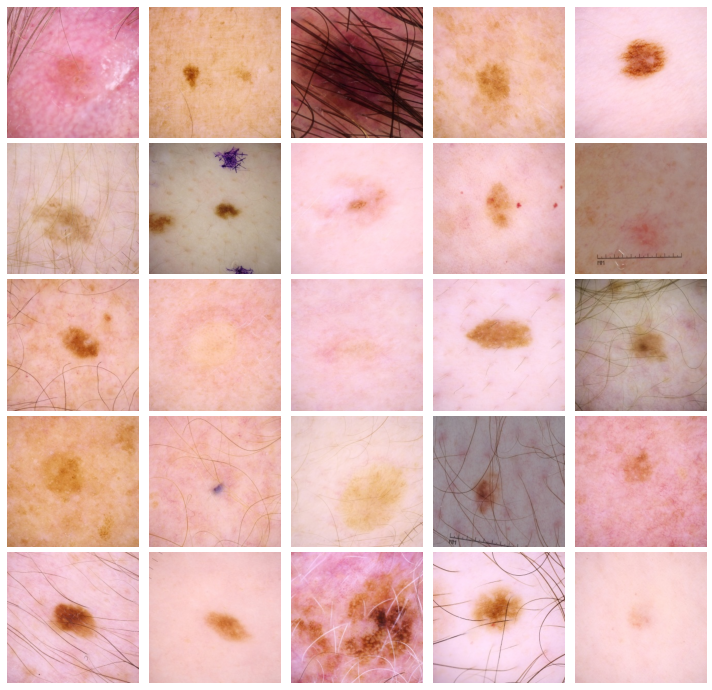

In [12]:
holo = df_8
trans = A.Compose(image_transformation_2)
holo.reset_index()
import matplotlib.pyplot as plt
import os

f , ax = plt.subplots(5,5)
f.set_size_inches(10, 10)
k = 0 
for i in range(5):
    for j in range(5):
        path = os.path.join("/mnt/data_lab513/dhsang/data/256x256",holo.iloc[k][0])
        x = cv2.imread(path)
        x = cv2.cvtColor(x,cv2.COLOR_BGR2RGB)
        # x = trans(image=x)
        # x = x["image"]
        ax[i,j].axis('off')
        ax[i,j].imshow(x)
        k = k + 1
    plt.tight_layout()